In [1]:
import pandas as pd
import numpy as np

c:\Users\Alfre\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Alfre\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\Alfre\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv(r'C:\Users\Alfre\Escritorio\github\TC3006c.101_EQ6\Limpieza_de_datos\train.csv')
kaggle_test = pd.read_csv(r"C:\Users\Alfre\Escritorio\github\TC3006c.101_EQ6\Limpieza_de_datos\test.csv")

In [3]:
df['FamSize'] = df['SibSp'] + df['Parch'] + 1

#we create features based on the family size
df['Single'] = df['FamSize'].map(lambda s: 1 if s == 1 else 0)
df['SmallF'] = df['FamSize'].map(lambda s: 1 if  2 <= s <= 4  else 0)
df['LarF'] = df['FamSize'].map(lambda s: 1 if 5 <= s else 0)

In [4]:
df.Embarked.fillna('S', inplace=True)

df_dummies = pd.get_dummies(df.Embarked, prefix='Embarked')
df = pd.concat([df, df_dummies], axis=1)

df.drop('Embarked', axis=1, inplace=True)

In [5]:
df.Cabin.fillna('U', inplace=True)

df['Cabin'] = df['Cabin'].map(lambda c: c[0])

#dummy
cabin_dummies = pd.get_dummies(df['Cabin'], prefix='Cabin')
df = pd.concat([df, cabin_dummies], axis=1)

df.drop('Cabin', axis=1, inplace=True)

In [6]:
titles = set()
for name in df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [7]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major":"Major",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle":"Miss",
    "Ms":"Mrs",
    "Mr":"Mr",
    "Mrs":"Mrs",
    "Miss":"Miss",
    "Master":"Master",
    "Lady":"Royalty"
}

df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

df['Title'] = df.Title.map(Title_Dictionary)

dfwoname = df.drop(['Name', 'Ticket'], axis=1)


In [8]:
dfwoname.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamSize,Single,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title
0,1,0,3,male,22.0,1,0,7.2500,2,0,...,0,0,0,0,0,0,0,0,1,Mr
1,2,1,1,female,38.0,1,0,71.2833,2,0,...,0,0,1,0,0,0,0,0,0,Mrs
2,3,1,3,female,26.0,0,0,7.9250,1,1,...,0,0,0,0,0,0,0,0,1,Miss
3,4,1,1,female,35.0,1,0,53.1000,2,0,...,0,0,1,0,0,0,0,0,0,Mrs
4,5,0,3,male,35.0,0,0,8.0500,1,1,...,0,0,0,0,0,0,0,0,1,Mr


In [9]:
grouped_train = dfwoname.groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()

In [10]:
grouped_train = dfwoname.groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [11]:
def fill_age(row):    
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) &
        (grouped_median_train['Title'] == row['Title']) &
        (grouped_median_train['Pclass'] == row['Pclass'])
    )

    if np.isnan(grouped_median_train[condition]['Age'].values[0]):
        print('true')
        condition = (
        (grouped_median_train['Sex'] == row['Sex']) &
        #(grouped_median_train['Title'] == row['Title']) &
        (grouped_median_train['Pclass'] == row['Pclass'])
    )

    return grouped_median_train[condition]['Age'].values[0]

def process_age():
    global df
    df['Age'] = df.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return df

In [12]:
df = process_age()

In [320]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,False,False,False,False,True,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,False,False,True,False,False,False,False,False,False,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,False,False,False,False,False,False,False,False,True,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,False,False,True,False,False,False,False,False,False,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,False,False,False,False,False,False,False,False,True,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,False,False,False,False,False,False,False,False,True,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,False,True,False,False,False,False,False,False,False,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,...,False,False,False,False,False,False,False,False,True,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,False,False,True,False,False,False,False,False,False,Mr


In [13]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

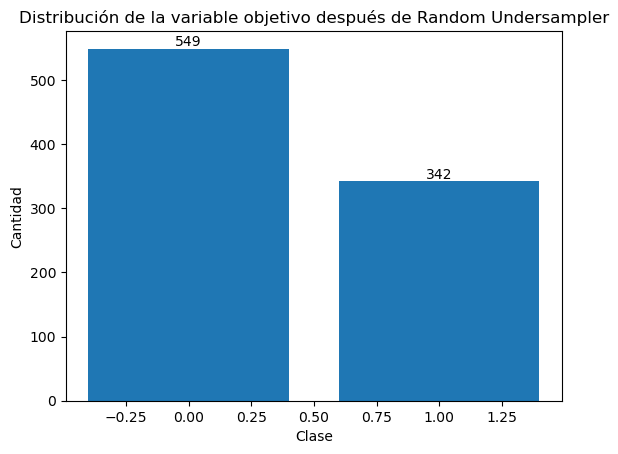

In [14]:
import matplotlib.pyplot as plt

# Datos de la distribución después de aplicar Random Undersampler
clases = [0, 1]
cantidad = [549, 342]

# Crear gráfico de barras
plt.bar(clases, cantidad)

# Agregar etiquetas de conteo en las barras
for i in range(len(clases)):
    plt.text(clases[i], cantidad[i], str(cantidad[i]), ha='center', va='bottom')

# Etiquetas y título del gráfico
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución de la variable objetivo después de Random Undersampler')

# Mostrar el gráfico
plt.show()

### Resampling techniques

Como vemos que hay un pequeño imbalance en las clases vamos a explorar algunas tecnicas de resampling para mejorar la prediccion de la clase minoritaria.

In [49]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,False,False,False,False,True,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,False,False,True,False,False,False,False,False,False,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,False,False,False,False,False,False,False,False,True,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,False,False,True,False,False,False,False,False,False,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,False,False,False,False,False,False,False,False,True,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,False,False,False,False,False,False,False,False,True,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,False,True,False,False,False,False,False,False,False,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,...,False,False,False,False,False,False,False,False,True,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,False,False,True,False,False,False,False,False,False,Mr


In [15]:
df_encoded = df.drop(['Name'], axis=1)

df_encoded = pd.get_dummies(df_encoded, columns=["Title"], prefix=["Title"])

df_encoded = df_encoded.drop(['Title_Royalty'], axis=1)


from sklearn.preprocessing import LabelEncoder
# Use LabelEncoder for "categorical_col"
label_encoder = LabelEncoder()
df_encoded["Ticket"] = label_encoder.fit_transform(df_encoded["Ticket"])
df_encoded["Sex"] = label_encoder.fit_transform(df_encoded["Sex"])



In [19]:
from sklearn.model_selection import train_test_split

# slpit df in train and test
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('Survived', axis = 1), df_encoded['Survived'], test_size=0.1, random_state=77)

In [17]:
### Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [18]:
### SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

AttributeError: 'NoneType' object has no attribute 'split'

In [253]:
y_resampled.value_counts()

Survived
0    485
1    485
Name: count, dtype: int64

In [21]:
import xgboost as xgb

In [22]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,       # Maximum depth of each tree
    learning_rate=0.1, # Step size shrinkage to prevent overfitting
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [23]:
y_pred = xgb_model.predict(X_test)


In [24]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8555555555555555


          Feature  Importance
27       Title_Mr    0.399857
1          Pclass    0.099013
2             Sex    0.098157
29  Title_Officer    0.092036
8         FamSize    0.049156
13     Embarked_Q    0.023343
19        Cabin_E    0.022067
4           SibSp    0.019805
25   Title_Master    0.019567
12     Embarked_C    0.019508
7            Fare    0.019203
23        Cabin_U    0.018399
14     Embarked_S    0.017349
6          Ticket    0.014701
3             Age    0.013927
0     PassengerId    0.013496
5           Parch    0.012613
10         SmallF    0.012377
18        Cabin_D    0.010702
17        Cabin_C    0.009555
15        Cabin_A    0.009011
28      Title_Mrs    0.006157
16        Cabin_B    0.000000
11           LarF    0.000000
20        Cabin_F    0.000000
21        Cabin_G    0.000000
22        Cabin_T    0.000000
24    Title_Major    0.000000
9          Single    0.000000
26     Title_Miss    0.000000


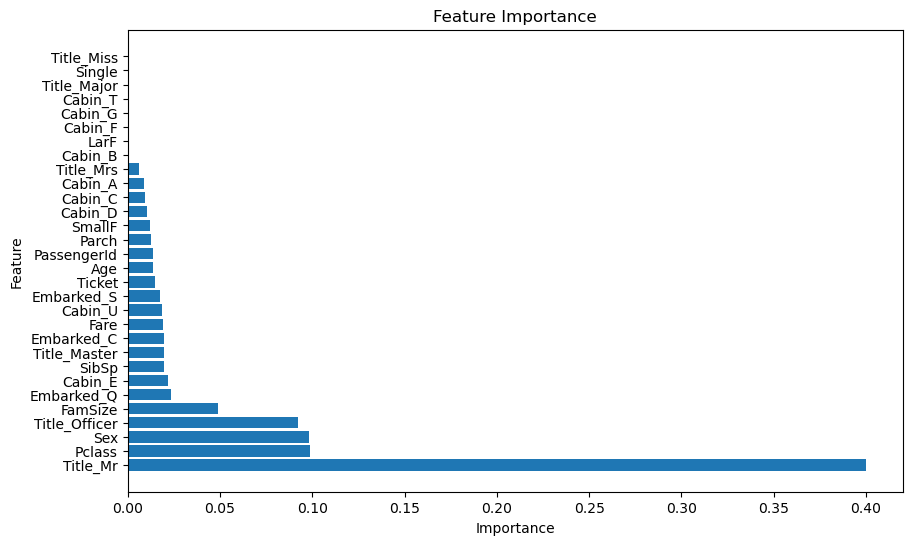

In [25]:
# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

28      Title_Mrs    0.006157
16        Cabin_B    0.000000
11           LarF    0.000000
20        Cabin_F    0.000000
21        Cabin_G    0.000000
22        Cabin_T    0.000000
24    Title_Major    0.000000
9          Single    0.000000
26     Title_Miss    0.000000

In [26]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

          Feature  Importance
2             Sex    0.222309
27       Title_Mr    0.219363
28      Title_Mrs    0.078042
7            Fare    0.071405
23        Cabin_U    0.069810
1          Pclass    0.065801
26     Title_Miss    0.054081
6          Ticket    0.041421
8         FamSize    0.031109
10         SmallF    0.028620
3             Age    0.027699
11           LarF    0.023865
4           SibSp    0.012309
25   Title_Master    0.007265
0     PassengerId    0.006889
17        Cabin_C    0.005972
14     Embarked_S    0.005531
5           Parch    0.004644
9          Single    0.004460
19        Cabin_E    0.004407
18        Cabin_D    0.004338
12     Embarked_C    0.004264
16        Cabin_B    0.003335
29  Title_Officer    0.001861
13     Embarked_Q    0.000931
20        Cabin_F    0.000138
21        Cabin_G    0.000131
24    Title_Major    0.000000
22        Cabin_T    0.000000
15        Cabin_A    0.000000


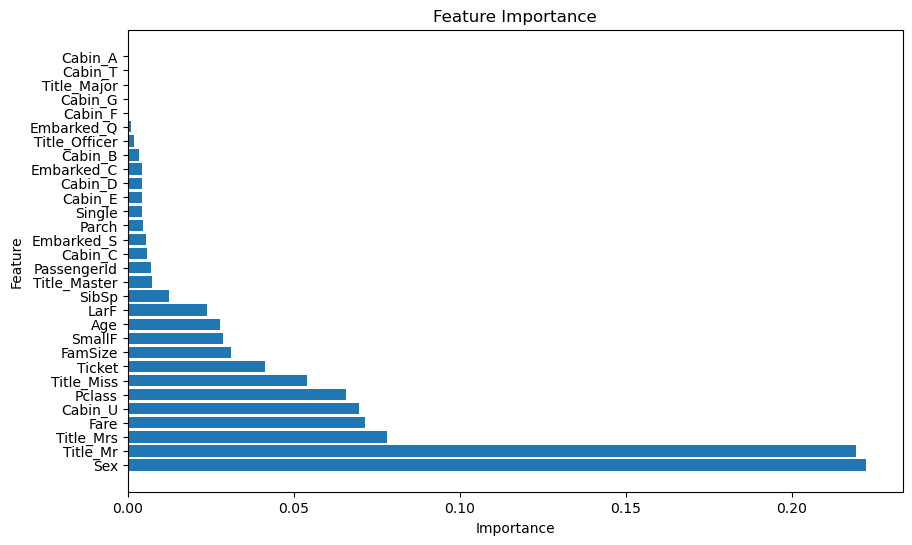

In [27]:
# Create and train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [28]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        64
           1       0.74      0.77      0.75        26

    accuracy                           0.86        90
   macro avg       0.82      0.83      0.83        90
weighted avg       0.86      0.86      0.86        90



### 2da iteracion usando features mas importantes > 0.01

#### xgb

28      Title_Mrs    0.006157
16        Cabin_B    0.000000
11           LarF    0.000000
20        Cabin_F    0.000000
21        Cabin_G    0.000000
22        Cabin_T    0.000000
24    Title_Major    0.000000
9          Single    0.000000
26     Title_Miss    0.000000

In [29]:
df_iter = df_encoded.drop(['Title_Mrs', 'Cabin_B', 'LarF', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Title_Major', 'Single', 'Title_Miss', 'SmallF'], axis=1)

In [30]:
df_iter.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,FamSize,...,Embarked_Q,Embarked_S,Cabin_A,Cabin_C,Cabin_D,Cabin_E,Cabin_U,Title_Master,Title_Mr,Title_Officer
0,1,0,3,1,22.0,1,0,523,7.25,2,...,0,1,0,0,0,0,1,0,1,0


In [31]:
from sklearn.model_selection import train_test_split

# slpit df in train and test
X_train, X_test, y_train, y_test = train_test_split(df_iter.drop('Survived', axis = 1), df_iter['Survived'], test_size=0.10, random_state=129) #rs: 129

xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)



from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, classification_report

#param_grid_gbc = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [3, 5, 7, 9], 'learning_rate': [0.1, 0.01, 0.001], 'subsample': [0.8, 1.0]}
param_grid_gbc = {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.1, 0.01], 'subsample': [0.8, 1.0]}

kfold = StratifiedKFold(n_splits=2, random_state=77, shuffle=True)

# Creamos el modelo
gbc = GradientBoostingClassifier(loss= 'log_loss',random_state=0)

# Definimos el objeto 'scorer' para ajustar automáticamente los hiperparámetros de un modelo usando GridSearchCV 
#scorer = make_scorer(accuracy_score)

# Definimos el GridSearchCV para el modelo GradientBoostingClassifier
grid_search_gbc = GridSearchCV(gbc, param_grid_gbc, cv=kfold, n_jobs=-1, scoring='f1_macro')

# Ajustamos GridSearchCV a los datos remuestreados
grid_search_gbc.fit(X_train, y_train)

# Obtenemos el mejor estimador para el modelo GradientBoostingClassifier
best_gbc = grid_search_gbc.best_estimator_

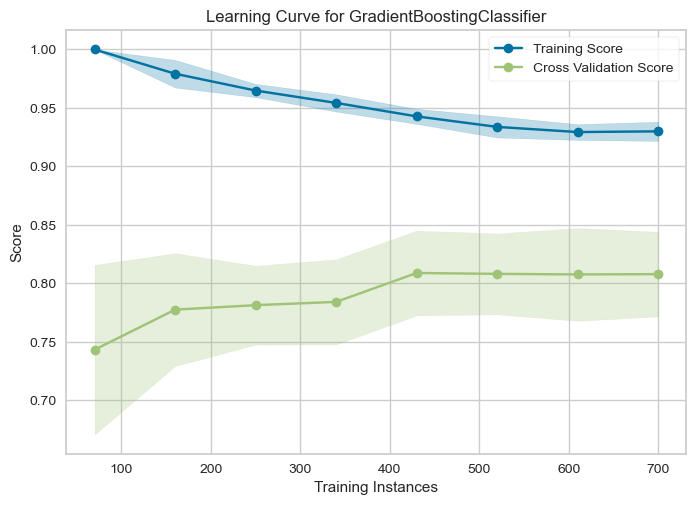

<AxesSubplot:title={'center':'Learning Curve for GradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [33]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from yellowbrick.model_selection import LearningCurve


# Fit the model
best_gbc.fit(X_train, y_train)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=8, random_state=77, shuffle=True)
sizes = np.linspace(0.1, 1.0, 8)

visualizer = LearningCurve(
    best_gbc, cv=cv, scoring=make_scorer(f1_score, average='macro'), train_sizes=sizes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Finalize and render the learning curve
visualizer.show()

In [34]:
# Realizamos las predicciones en el conjunto de prueba
y_pred_gbc = best_gbc.predict(X_test)

# Generamos el informe de clasificación
classification_report_gbc = classification_report(y_test, y_pred_gbc)
print("Gradient Boosting Classifier Classification Report:")
print(classification_report_gbc)

#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
print("Gradient Boosting Classifier Confusion Matrix:")
print(confusion_matrix_gbc)

Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        50
           1       0.91      0.78      0.84        40

    accuracy                           0.87        90
   macro avg       0.88      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90

Gradient Boosting Classifier Confusion Matrix:
[[47  3]
 [ 9 31]]


In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_gbc)
print("Accuracy:", accuracy)

Accuracy: 0.8666666666666667


          Feature  Importance
18       Title_Mr    0.455197
19  Title_Officer    0.163281
8         FamSize    0.072566
1          Pclass    0.056589
15        Cabin_E    0.042775
14        Cabin_D    0.036008
12        Cabin_A    0.017881
7            Fare    0.017569
6          Ticket    0.016595
16        Cabin_U    0.014779
3             Age    0.014299
2             Sex    0.013518
0     PassengerId    0.012492
10     Embarked_Q    0.011046
11     Embarked_S    0.010703
13        Cabin_C    0.010136
4           SibSp    0.009714
5           Parch    0.009245
9      Embarked_C    0.008206
17   Title_Master    0.007399


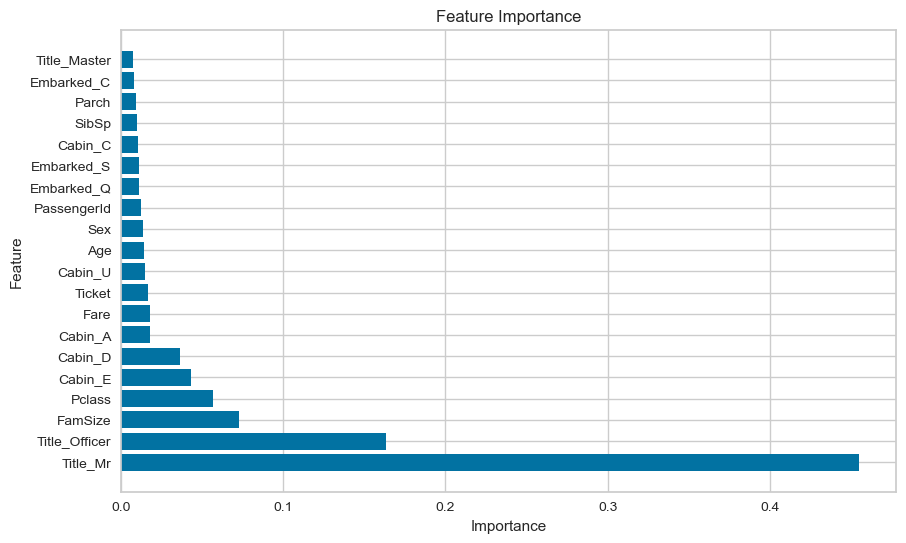

In [36]:
# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

28      Title_Mrs    0.006157
16        Cabin_B    0.000000
11           LarF    0.000000
20        Cabin_F    0.000000
21        Cabin_G    0.000000
22        Cabin_T    0.000000
24    Title_Major    0.000000
9          Single    0.000000
26     Title_Miss    0.000000

In [37]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

          Feature  Importance
18       Title_Mr    0.263064
2             Sex    0.246245
7            Fare    0.107231
1          Pclass    0.085709
16        Cabin_U    0.080354
6          Ticket    0.060631
8         FamSize    0.042136
3             Age    0.030008
4           SibSp    0.022149
5           Parch    0.012486
15        Cabin_E    0.008999
0     PassengerId    0.008679
17   Title_Master    0.008477
11     Embarked_S    0.006635
14        Cabin_D    0.006378
13        Cabin_C    0.004085
9      Embarked_C    0.002927
12        Cabin_A    0.001625
10     Embarked_Q    0.001253
19  Title_Officer    0.000929


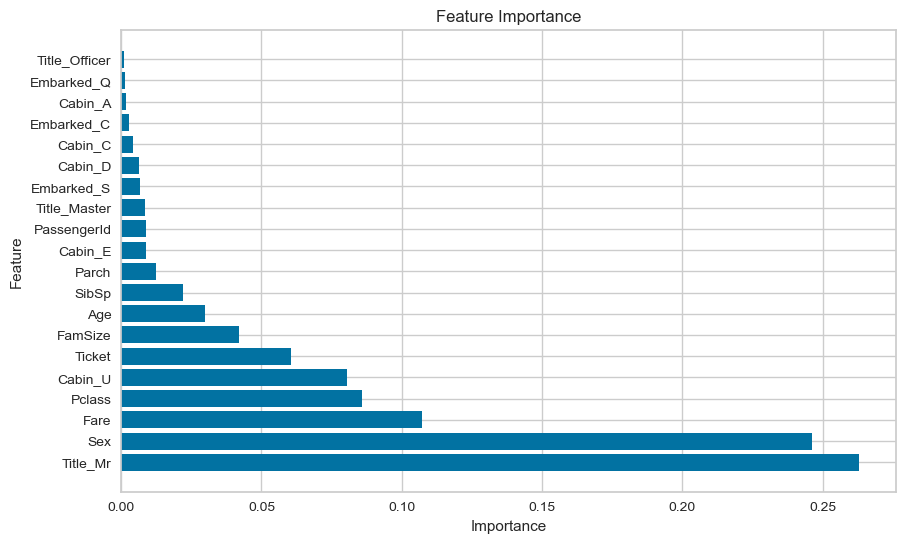

In [38]:
# Create and train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [39]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        50
           1       0.94      0.78      0.85        40

    accuracy                           0.88        90
   macro avg       0.89      0.87      0.87        90
weighted avg       0.89      0.88      0.88        90



In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8777777777777778


### rf

25   Title_Master    0.007265
0     PassengerId    0.006889
17        Cabin_C    0.005972
14     Embarked_S    0.005531
5           Parch    0.004644
9          Single    0.004460
19        Cabin_E    0.004407
18        Cabin_D    0.004338
12     Embarked_C    0.004264
16        Cabin_B    0.003335
29  Title_Officer    0.001861
13     Embarked_Q    0.000931
20        Cabin_F    0.000138
21        Cabin_G    0.000131
24    Title_Major    0.000000
22        Cabin_T    0.000000
15        Cabin_A    0.000000

In [41]:
df_iter = df_encoded.drop(['Title_Master', 'PassengerId', 'Cabin_C', 'Embarked_S', 'Embarked_S', 'Parch', 'Single', 'Cabin_E', 'Cabin_D', 'Embarked_C', 'Cabin_B', 'Title_Officer',
'Embarked_Q', 'Cabin_F', 'Cabin_G', 'Title_Major', 'Cabin_T', 'Cabin_A'], axis=1)

In [42]:
from sklearn.model_selection import train_test_split

# slpit df in train and test
X_train, X_test, y_train, y_test = train_test_split(df_iter.drop('Survived', axis = 1), df_iter['Survived'], test_size=0.1, random_state=77)

In [43]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,       # Maximum depth of each tree
    learning_rate=0.1, # Step size shrinkage to prevent overfitting
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [47]:
y_pred = xgb_model.predict(X_test)


In [48]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8555555555555555


       Feature  Importance
11    Title_Mr    0.491321
1          Sex    0.164584
0       Pclass    0.132473
6      FamSize    0.049569
7       SmallF    0.030708
5         Fare    0.028846
4       Ticket    0.024928
9      Cabin_U    0.024596
3        SibSp    0.024526
2          Age    0.022395
12   Title_Mrs    0.006054
8         LarF    0.000000
10  Title_Miss    0.000000


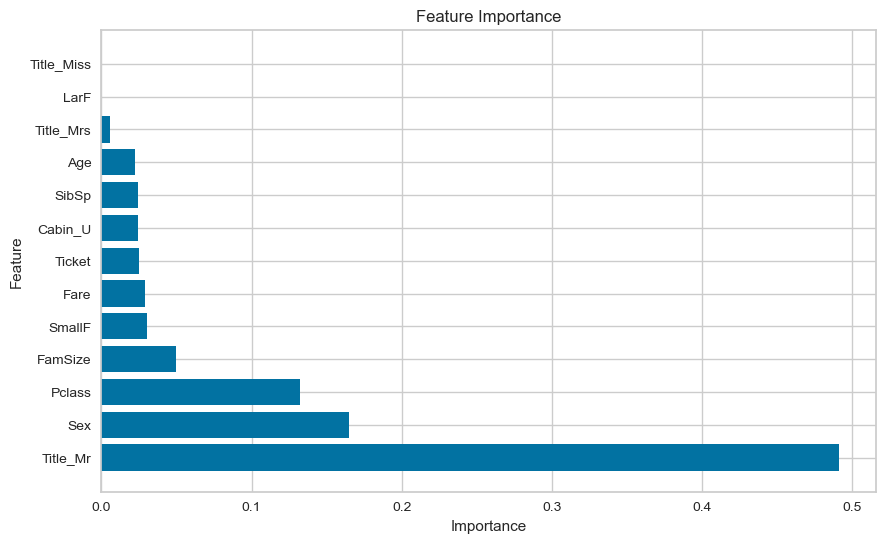

In [49]:
# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

28      Title_Mrs    0.006157
16        Cabin_B    0.000000
11           LarF    0.000000
20        Cabin_F    0.000000
21        Cabin_G    0.000000
22        Cabin_T    0.000000
24    Title_Major    0.000000
9          Single    0.000000
26     Title_Miss    0.000000

In [50]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

       Feature  Importance
1          Sex    0.244925
11    Title_Mr    0.212756
10  Title_Miss    0.093262
0       Pclass    0.076885
5         Fare    0.072054
9      Cabin_U    0.069865
12   Title_Mrs    0.068362
4       Ticket    0.041447
2          Age    0.031302
6      FamSize    0.027658
8         LarF    0.026046
7       SmallF    0.019115
3        SibSp    0.016323


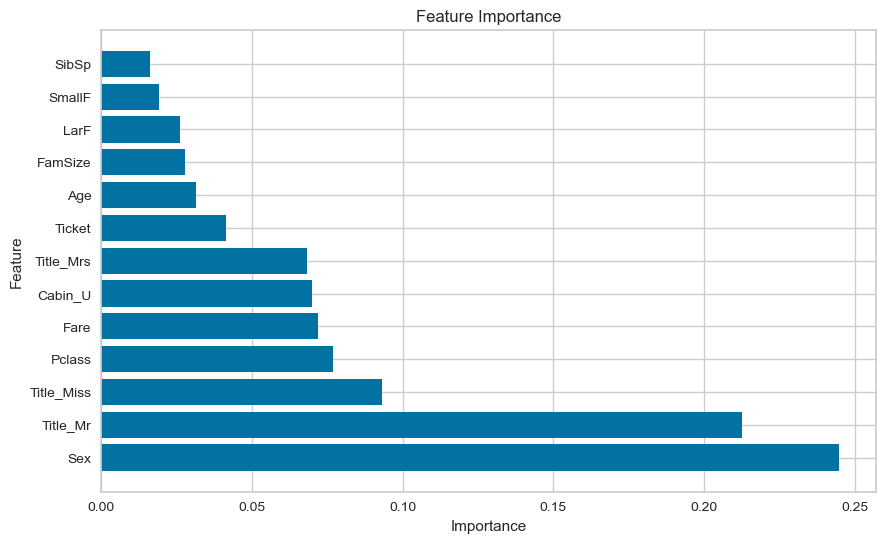

In [51]:
# Create and train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [52]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        64
           1       0.74      0.77      0.75        26

    accuracy                           0.86        90
   macro avg       0.82      0.83      0.83        90
weighted avg       0.86      0.86      0.86        90



In [53]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8555555555555555


### kaggle best model pred

In [54]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import optuna

In [55]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df_iter.drop('Survived', axis = 1), df_iter['Survived'], test_size=0.1, random_state=42)

# Define the objective function for Optuna optimization
def objective(trial):
    params = {
        "objective": "multi:softmax",  # Change this based on your problem type
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "num_class": 2,  # Number of classes in the target variable
        "eval_metric": "mlogloss"  # Change this based on your problem type
    }
    
    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average="macro")
    return f1

# Create a study object and optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Print optimization results
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2023-09-09 20:46:05,844] A new study created in memory with name: no-name-ed0653c3-3cbe-4519-9c1a-3213d4926369
[I 2023-09-09 20:46:06,344] Trial 0 finished with value: 0.8514285714285714 and parameters: {'n_estimators': 220, 'max_depth': 8, 'learning_rate': 0.12173059871050994, 'subsample': 0.6215235733131182, 'colsample_bytree': 0.8795538475140416}. Best is trial 0 with value: 0.8514285714285714.
[I 2023-09-09 20:46:06,549] Trial 1 finished with value: 0.8488176767024164 and parameters: {'n_estimators': 80, 'max_depth': 7, 'learning_rate': 0.02056586092753547, 'subsample': 0.8855275785962349, 'colsample_bytree': 0.8987368142584944}. Best is trial 0 with value: 0.8514285714285714.
[I 2023-09-09 20:46:06,788] Trial 2 finished with value: 0.840587044534413 and parameters: {'n_estimators': 97, 'max_depth': 8, 'learning_rate': 0.2606259300294375, 'subsample': 0.6393042011239732, 'colsample_bytree': 0.8844887357741225}. Best is trial 0 with value: 0.8514285714285714.
[I 2023-09-09 20:46:

KeyboardInterrupt: 

In [56]:
#xgb_model = xgb.XGBClassifier()

#xgb_model.fit(df_iter.drop('Survived', axis=1), df_iter['Survived'])
X_train, X_val, y_train, y_val = train_test_split(df_iter.drop('Survived', axis = 1), df_iter['Survived'], test_size=0.1, random_state=42)

# Best hyperparameters obtained from Optuna
best_params = {
    "objective": "multi:softmax",  # Change this based on your problem type
    "n_estimators": 211,
    "max_depth": 3,
    "learning_rate": 0.14075376362886963,
    "subsample": 0.9702185432549054,
    "colsample_bytree": 0.6679500638509408,
    "num_class": 2,  # Number of classes in the target variable
    "eval_metric": "mlogloss"  # Change this based on your problem type
}

# Create and train the final XGBoost model
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

y_pred_kaggle = final_model.predict(X_val)


In [57]:
from sklearn.metrics import classification_report

# Make predictions
#y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_val, y_pred_kaggle)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90        54
           1       0.82      0.89      0.85        36

    accuracy                           0.88        90
   macro avg       0.87      0.88      0.87        90
weighted avg       0.88      0.88      0.88        90



In [60]:
#kaggle_pred['Survived'] = y_pred_kaggle

#kaggle_pred = kaggle_pred[['PassengerId', 'Survived']]

#kaggle_pred.to_csv('submission.csv', index=False)

In [59]:
# Convert the NumPy array to a pandas DataFrame
kg = pd.DataFrame(y_pred_kaggle)

# Save the DataFrame to a CSV file
csv_filename = "submission.csv"
kg.to_csv(csv_filename, index=False)

In [404]:
#y_pred_kaggle.to_csv('submission.csv', index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [286]:
kaggle_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamSize,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,1,...,False,False,False,False,False,False,False,False,True,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,2,...,True,False,False,False,False,False,False,False,True,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,1,...,False,False,False,False,False,False,False,False,True,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,1,...,True,False,False,False,False,False,False,False,True,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,3,...,True,False,False,False,False,False,False,False,True,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,1,...,True,False,False,False,False,False,False,False,True,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,1,...,False,False,False,True,False,False,False,False,False,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,1,...,True,False,False,False,False,False,False,False,True,Mr
416,1308,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,1,...,True,False,False,False,False,False,False,False,True,Mr


In [378]:
kaggle_test = pd.read_csv(r"C:\Users\Alfre\Escritorio\github\TC3006c.101_EQ6\Limpieza_de_datos\test.csv")

In [379]:
kaggle_test.shape

(418, 11)

In [380]:
kaggle_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [381]:
kaggle_test['FamSize'] = kaggle_test['SibSp'] + kaggle_test['Parch'] + 1

#we create features based on the family size
kaggle_test['Single'] = kaggle_test['FamSize'].map(lambda s: 1 if s == 1 else 0)
kaggle_test['SmallF'] = kaggle_test['FamSize'].map(lambda s: 1 if  2 <= s <= 4  else 0)
kaggle_test['LarF'] = kaggle_test['FamSize'].map(lambda s: 1 if 5 <= s else 0)

kaggle_test.Embarked.fillna('S', inplace=True)


In [382]:

df_dummies = pd.get_dummies(kaggle_test.Embarked, prefix='Embarked')
kaggle_test = pd.concat([kaggle_test, df_dummies], axis=1)

kaggle_test.drop('Embarked', axis=1, inplace=True)

In [383]:
kaggle_test.Cabin.fillna('U', inplace=True)

kaggle_test['Cabin'] = kaggle_test['Cabin'].map(lambda c: c[0])

#dummy
cabin_dummies = pd.get_dummies(kaggle_test['Cabin'], prefix='Cabin')
kaggle_test = pd.concat([kaggle_test, cabin_dummies], axis=1)

kaggle_test.drop('Cabin', axis=1, inplace=True)

In [384]:
titles = set()
for name in kaggle_test['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [385]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major":"Major",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle":"Miss",
    "Ms":"Mrs",
    "Mr":"Mr",
    "Mrs":"Mrs",
    "Miss":"Miss",
    "Master":"Master",
    "Lady":"Royalty"
}

kaggle_test['Title'] = kaggle_test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

kaggle_test['Title'] = kaggle_test.Title.map(Title_Dictionary)


dfwoname = kaggle_test.drop(['Name', 'Ticket'], axis=1)


In [386]:
dfwoname.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamSize,Single,SmallF,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Title
0,892,3,male,34.5,0,0,7.8292,1,1,0,...,False,False,False,False,False,False,False,False,True,Mr
1,893,3,female,47.0,1,0,7.0000,2,0,1,...,True,False,False,False,False,False,False,False,True,Mrs
2,894,2,male,62.0,0,0,9.6875,1,1,0,...,False,False,False,False,False,False,False,False,True,Mr
3,895,3,male,27.0,0,0,8.6625,1,1,0,...,True,False,False,False,False,False,False,False,True,Mr
4,896,3,female,22.0,1,1,12.2875,3,0,1,...,True,False,False,False,False,False,False,False,True,Mrs


In [387]:
grouped_train = dfwoname.groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()

In [388]:
grouped_train = dfwoname.groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [389]:
def fill_age(row):    
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) &
        (grouped_median_train['Title'] == row['Title']) &
        (grouped_median_train['Pclass'] == row['Pclass'])
    )

    if np.isnan(grouped_median_train[condition]['Age'].values[0]):
        print('true')
        condition = (
        (grouped_median_train['Sex'] == row['Sex']) &
        #(grouped_median_train['Title'] == row['Title']) &
        (grouped_median_train['Pclass'] == row['Pclass'])
    )

    return grouped_median_train[condition]['Age'].values[0]

def process_age():
    global kaggle_test
    kaggle_test['Age'] = kaggle_test.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return kaggle_test

In [390]:
kaggle_test = process_age()

In [391]:
kaggle_test = kaggle_test.drop(['Name'], axis=1)

kaggle_test = pd.get_dummies(kaggle_test, columns=["Title"], prefix=["Title"])

#kaggle_test = kaggle_test.drop(['Title_Royalty'], axis=1)


from sklearn.preprocessing import LabelEncoder
# Use LabelEncoder for "categorical_col"
label_encoder = LabelEncoder()
kaggle_test["Ticket"] = label_encoder.fit_transform(kaggle_test["Ticket"])
kaggle_test["Sex"] = label_encoder.fit_transform(kaggle_test["Sex"])



In [393]:
kaggle_test = kaggle_test.drop(['PassengerId', 'Cabin_C', 'Embarked_S', 'Embarked_S', 'Parch', 'Single', 'Cabin_E', 'Cabin_D', 'Embarked_C', 'Cabin_B', 'Embarked_Q', 'Cabin_F', 'Cabin_G', 'Cabin_A'], axis=1)

In [398]:
kaggle_test['Title_Major'] = False

In [401]:
kaggle_test = kaggle_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Ticket', 'Fare',
        'FamSize', 'SmallF', 'LarF', 'Cabin_U', 'Title_Major', 'Title_Master',
        'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer']]

In [402]:
kaggle_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Ticket', 'Fare', 'FamSize', 'SmallF',
       'LarF', 'Cabin_U', 'Title_Major', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer'],
      dtype='object')

In [396]:
df_iter.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Ticket', 'Fare',
       'FamSize', 'SmallF', 'LarF', 'Cabin_U', 'Title_Major', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer'],
      dtype='object')